In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import itertools
from scipy.special import perm

# Tool Functions

In [3]:
from tools import rhcRunner, saRunner, gaRunner, mimicRunner, repeat_algorithm, compare, tune_max_attempts_plot, \
               problem_size_plot, iteration_plot, fitness_per_iteration_plot

# Queens

In [4]:
# Define alternative N-Queens fitness function for maximization problem
# state: 1d array of N elements means row indices of each of N columns.
def queens_max(state):
   # Initialize counter
    fitness_score = 0

  # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i+1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) and (state[j]-state[i] !=  j-i) and (state[j]-state[i] !=  i-j):
               # If no attacks, then increment counter
               fitness_score += 1

    return fitness_score

## problem set

In [5]:
N_list = [4, 8, 16, 32]
problem_set = []
for N in N_list:
    print(f'Expected best score is {N*(N-1)/2}')
    # Initialize custom fitness function object
    queens_fitness_func = mlrose.CustomFitness(queens_max)
    problem_queens = mlrose.DiscreteOpt(length=N, fitness_fn=queens_fitness_func, maximize=True, max_val=N)    
    problem_set.append(problem_queens)

Expected best score is 6.0
Expected best score is 28.0
Expected best score is 120.0
Expected best score is 496.0


## complex problem

In [6]:
N_complex = 32
print(f'Expected best score is {N_complex*(N_complex-1)/2}')
# Initialize custom fitness function object
queens_fitness_func = mlrose.CustomFitness(queens_max)
problem_queens_complex = mlrose.DiscreteOpt(length=N_complex, fitness_fn=queens_fitness_func, maximize=True, max_val=N_complex)

Expected best score is 496.0


### RHC

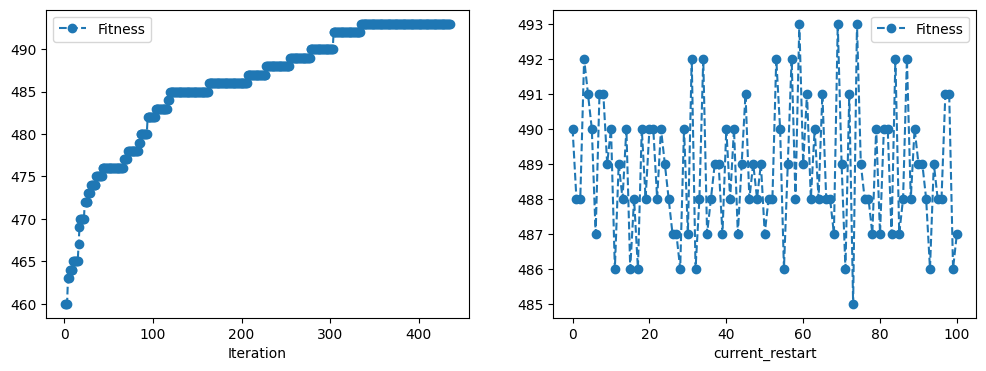

Best fitness is 493.
Best parameter is {'current_restart': 59, 'max_iters': 500, 'Iteration': 335}.
Iteration to converge or stop is 335.
Time spent is 6.081041 seconds.
Time per iteration is 0.000299 seconds.
CPU times: user 2min 12s, sys: 809 ms, total: 2min 13s
Wall time: 2min 57s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x157be6790>,
 'iteration_list': [500],
 'max_attempts': 100,
 'restart_num': 100}

In [26]:
%%time
params = {
    'problem': problem_queens_complex,
    'iteration_list': [500],
    'max_attempts': 100,
    'restart_num': 100
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = rhcRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_queens_rhc = {
    'problem': problem_queens_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'restart_num': params['restart_num']
}
params_complex_queens_rhc

In [7]:
# params_complex_queens_rhc = {
#     'problem': problem_queens_complex,
#  'iteration_list': [500],
#  'max_attempts': 100,
#  'restart_num': 100
# }

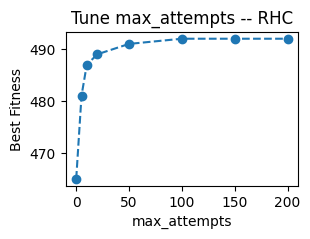

CPU times: user 3min 16s, sys: 699 ms, total: 3min 17s
Wall time: 4min 14s


In [24]:
%%time
fitness_list = tune_max_attempts_plot(rhcRunner, 
                                      'RHC',
                                      attempts_list=[0,5,10,20,50,100,150,200], 
                                      best_params=params_complex_queens_rhc)

### SA

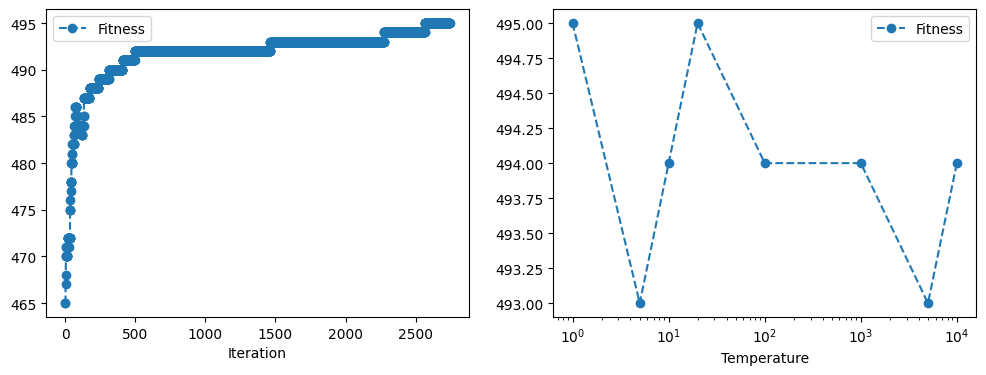

Best fitness is 495.
Best parameter is {'Temperature': 1, 'max_iters': 50000, 'Iteration': 2566}.
Iteration to converge or stop is 2566.
Time spent is 1.511685 seconds.
Time per iteration is 0.000589 seconds.
CPU times: user 8.1 s, sys: 299 ms, total: 8.4 s
Wall time: 10.5 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x157be6790>,
 'iteration_list': [50000],
 'max_attempts': 100,
 'temperature_list': [1]}

In [27]:
%%time
params = {
    'problem': problem_queens_complex,
    'iteration_list': [50000],
    'max_attempts': 100,
    'temperature_list': [1, 5, 10, 20, 100, 1000, 5000,10000]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = saRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_queens_sa = {
    'problem': problem_queens_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'temperature_list': [best_param['Temperature']]
}
params_complex_queens_sa

In [8]:
# params_complex_queens_sa = {
#     'problem': problem_queens_complex,
#  'iteration_list': [50000],
#  'max_attempts': 100,
#  'temperature_list': [1]
# }

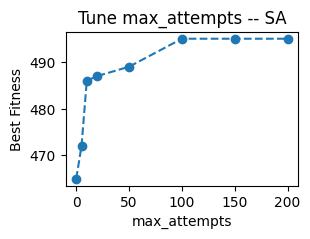

CPU times: user 5.78 s, sys: 94.4 ms, total: 5.88 s
Wall time: 7.49 s


In [28]:
%%time
fitness_list = tune_max_attempts_plot(saRunner, 
                                      'SA',
                                      attempts_list=[0,5,10,20,50,100,150,200], 
                                      best_params=params_complex_queens_sa)

### GA

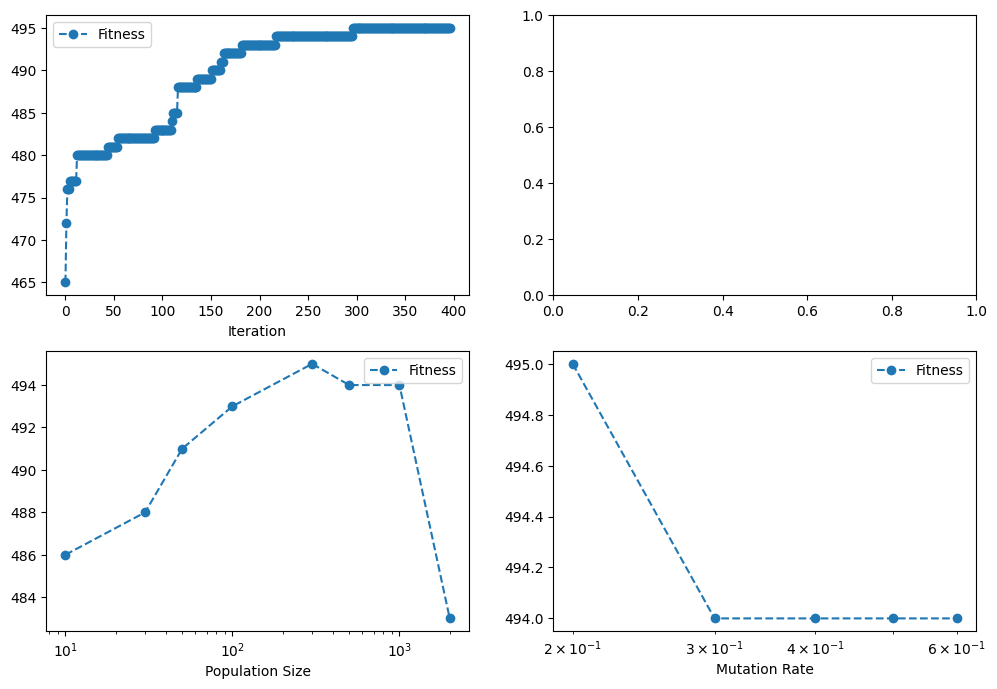

Best fitness is 495.
Best parameter is {'Population Size': 300, 'Mutation Rate': 0.2, 'max_iters': 500, 'Iteration': 296}.
Iteration to converge or stop is 296.
Time spent is 0.977107 seconds.
Time per iteration is 0.003301 seconds.
CPU times: user 19min 38s, sys: 3.21 s, total: 19min 42s
Wall time: 26min 16s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x157be6790>,
 'iteration_list': [500],
 'max_attempts': 100,
 'population_sizes': [300],
 'mutation_rates': [0.2]}

In [29]:
%%time
params = {
    'problem': problem_queens_complex,
    'iteration_list': [500],
    'max_attempts': 100,
    'population_sizes': [10, 30, 50, 100, 300, 500, 1000, 2000],
    'mutation_rates': [0.2, 0.3, 0.4, 0.5, 0.6]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = gaRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_queens_ga = {
    'problem': problem_queens_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'mutation_rates': [best_param['Mutation Rate']]
}
params_complex_queens_ga

In [9]:
# params_complex_queens_ga = {
#     'problem': problem_queens_complex,
#  'iteration_list': [500],
#  'max_attempts': 100,
#  'population_sizes': [300],
#  'mutation_rates': [0.2]
# }

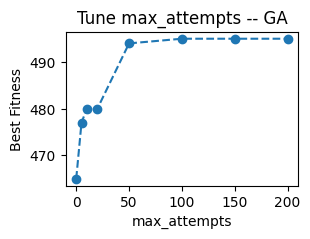

CPU times: user 2min 14s, sys: 325 ms, total: 2min 15s
Wall time: 3min 10s


In [30]:
%%time
fitness_list = tune_max_attempts_plot(gaRunner, 
                                      'GA',
                                      attempts_list=[0,5,10,20,50,100,150,200], 
                                      best_params=params_complex_queens_ga)

### MIMIC

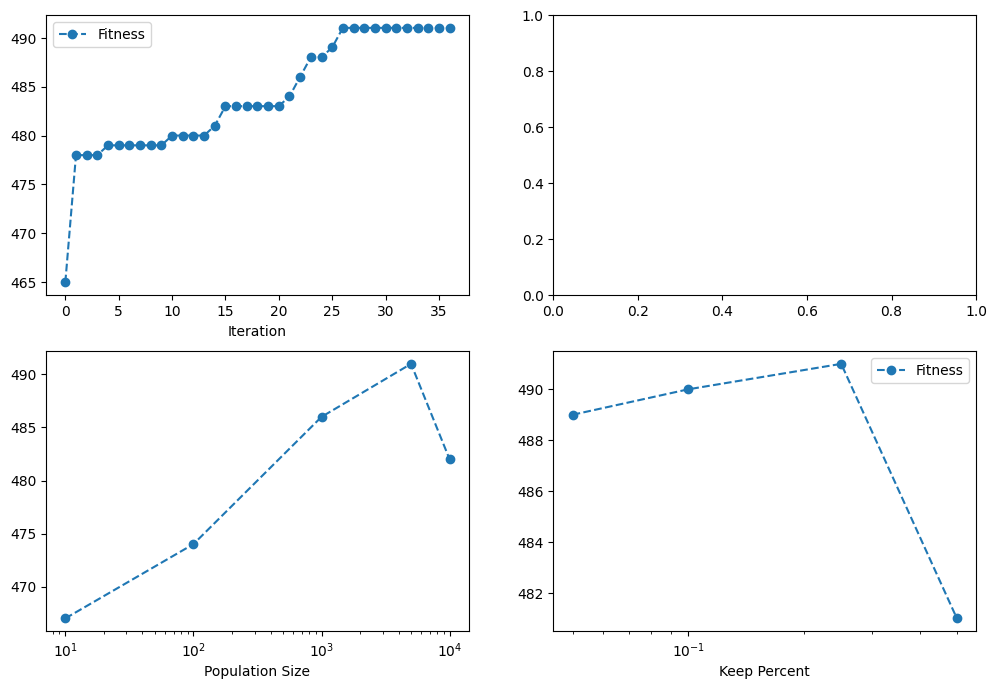

Best fitness is 491.
Best parameter is {'Population Size': 5000, 'Keep Percent': 0.25, 'max_iters': 100, 'Iteration': 26}.
Iteration to converge or stop is 26.
Time spent is 0.771688 seconds.
Time per iteration is 0.02968 seconds.
CPU times: user 24min 26s, sys: 45.6 s, total: 25min 12s
Wall time: 32min 41s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x13832fa00>,
 'iteration_list': [100],
 'max_attempts': 10,
 'population_sizes': [5000],
 'keep_percent_list': [0.25]}

In [12]:
%%time
params = {
    'problem': problem_queens_complex,
    'iteration_list': [100],
    'max_attempts': 10,
    'population_sizes': [10, 100, 1000, 5000, 10000],
    'keep_percent_list': [0.05, 0.1, 0.25, 0.5]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = mimicRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_queens_mimic = {
    'problem': problem_queens_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'keep_percent_list': [best_param['Keep Percent']]
}
params_complex_queens_mimic

In [10]:
# params_complex_queens_mimic = {
#     'problem': problem_queens_complex,
#  'iteration_list': [100],
#  'max_attempts': 10,
#  'population_sizes': [5000],
#  'keep_percent_list': [0.25]
# }

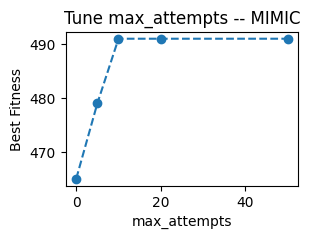

CPU times: user 16min 14s, sys: 37 s, total: 16min 51s
Wall time: 19min 27s


In [13]:
%%time
fitness_list = tune_max_attempts_plot(mimicRunner, 
                                      'MIMIC',
                                      attempts_list=[0,5,10,20,50], 
                                      best_params=params_complex_queens_mimic)

### compare

In [11]:
%%time
problem=problem_queens_complex
RHC_params=params_complex_queens_rhc
SA_params=params_complex_queens_sa
GA_params=params_complex_queens_ga 
MIMIC_params=params_complex_queens_mimic
RHC_params['problem'] = problem
SA_params['problem'] = problem
GA_params['problem'] = problem
MIMIC_params['problem'] = problem
rhc_result = repeat_algorithm(rhcRunner, RHC_params, repeat=3)
rhc_result.index = ['RHC']
sa_result = repeat_algorithm(saRunner, SA_params, repeat=3)
sa_result.index = ['SA']
ga_result = repeat_algorithm(gaRunner, GA_params, repeat=3)
ga_result.index = ['GA']
mimic_result = repeat_algorithm(mimicRunner, MIMIC_params, repeat=3)
mimic_result.index = ['MIMIC']
result = pd.concat([rhc_result, sa_result, ga_result, mimic_result])
result

CPU times: user 1h 4min 1s, sys: 43.1 s, total: 1h 4min 44s
Wall time: 1h 4min 57s


,best_fitness,mean_fitness,iter_num,converge_time_s,iter_time
RHC,491,490,131,7.115018,0.000294
SA,494,492,782,0.264760,0.000338
GA,492,489,76,1.598507,0.021021
MIMIC,487,486,9,8.352745,0.888993


In [18]:
# compare(problem_queens_complex, 
#         RHC_params=params_complex_queens_rhc, 
#         SA_params=params_complex_queens_sa, 
#         GA_params=params_complex_queens_ga, 
#         MIMIC_params=params_complex_queens_mimic
#        )

#### problem size

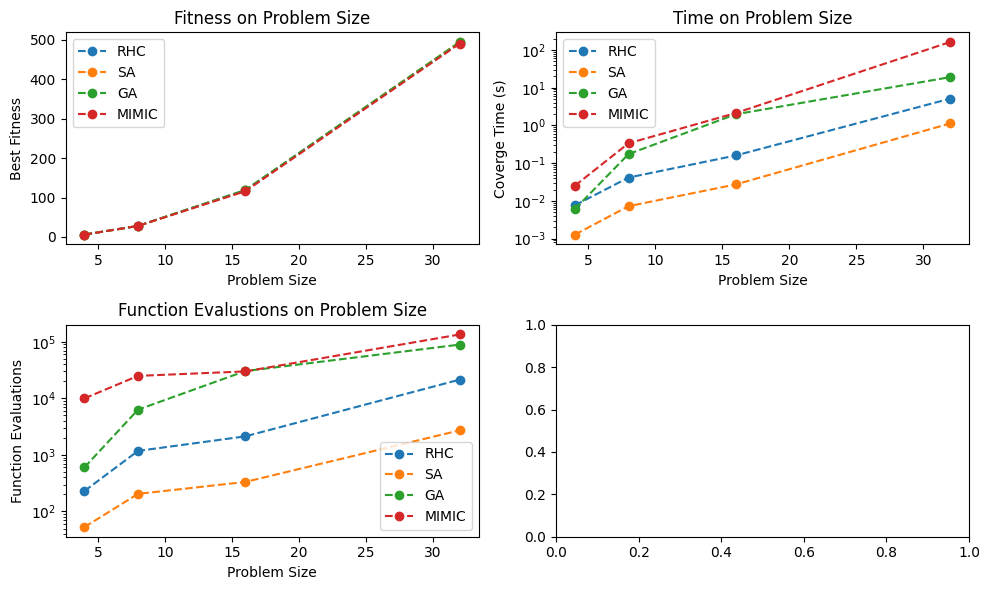

CPU times: user 6min 50s, sys: 8.73 s, total: 6min 59s
Wall time: 8min 19s


,4,8,16,32
fitness_RHC,6.000000,28.000000,119.000000,493.000000
converge_time_RHC,0.007633,0.041482,0.159956,5.138165
func_evals_RHC,230.000000,1179.000000,2130.000000,21488.000000
fitness_SA,6.000000,28.000000,118.000000,495.000000
converge_time_SA,0.001278,0.007232,0.027310,1.130765
func_evals_SA,53.000000,205.000000,333.000000,2725.000000
fitness_GA,6.000000,28.000000,119.000000,495.000000
converge_time_GA,0.006060,0.174138,1.979596,19.117024
func_evals_GA,602.000000,6323.000000,30408.000000,89413.000000
fitness_MIMIC,6.000000,28.000000,116.000000,491.000000


In [15]:
%%time
best_params_list = [
    params_complex_queens_rhc,
    params_complex_queens_sa,
    params_complex_queens_ga,
    params_complex_queens_mimic
]
N_result = problem_size_plot(N_list, problem_set, best_params_list, repeat=1)
N_result

#### iteration

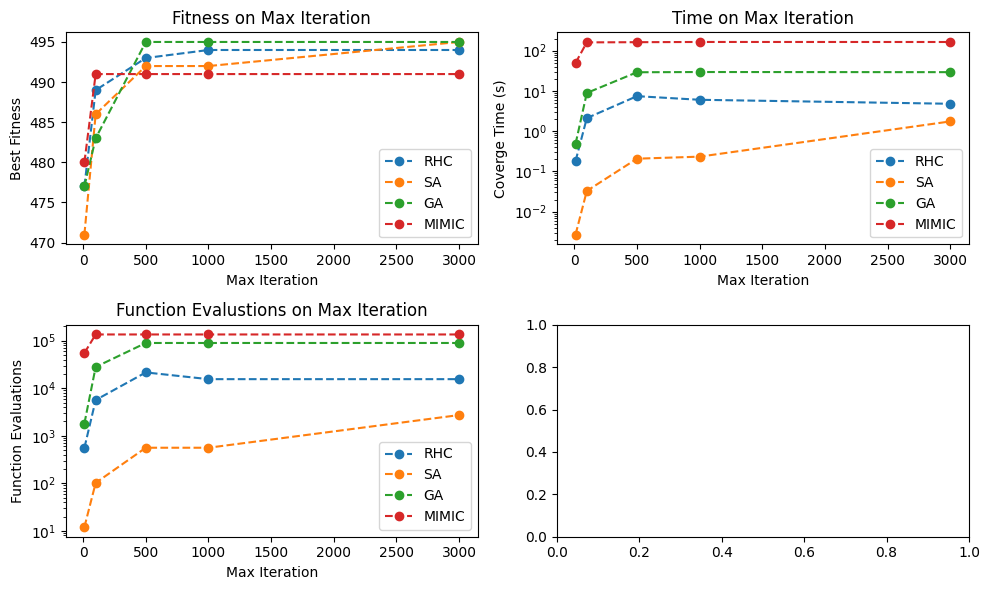

CPU times: user 20min 28s, sys: 20.5 s, total: 20min 48s
Wall time: 26min 35s


,10,100,500,1000,3000
fitness_RHC,477.000000,489.000000,493.000000,494.000000,494.000000
converge_time_RHC,0.180588,2.111898,7.413957,6.027247,4.797209
func_evals_RHC,556.000000,5639.000000,21488.000000,15507.000000,15507.000000
fitness_SA,471.000000,486.000000,492.000000,492.000000,495.000000
converge_time_SA,0.002695,0.032761,0.207242,0.232860,1.747945
func_evals_SA,12.000000,102.000000,560.000000,560.000000,2725.000000
fitness_GA,477.000000,483.000000,495.000000,495.000000,495.000000
converge_time_GA,0.481574,8.911828,29.103276,29.513660,29.279968
func_evals_GA,1808.000000,27999.000000,89413.000000,89413.000000,89413.000000
fitness_MIMIC,480.000000,491.000000,491.000000,491.000000,491.000000


In [11]:
%%time
best_params_list = [
    params_complex_queens_rhc,
    params_complex_queens_sa,
    params_complex_queens_ga,
    params_complex_queens_mimic
]
iter_list = [10, 100, 500, 1000, 3000]
iter_result = iteration_plot(iter_list, best_params_list, repeat=1)
iter_result

plot RHC...
plot SA...
plot GA...
plot MIMIC...


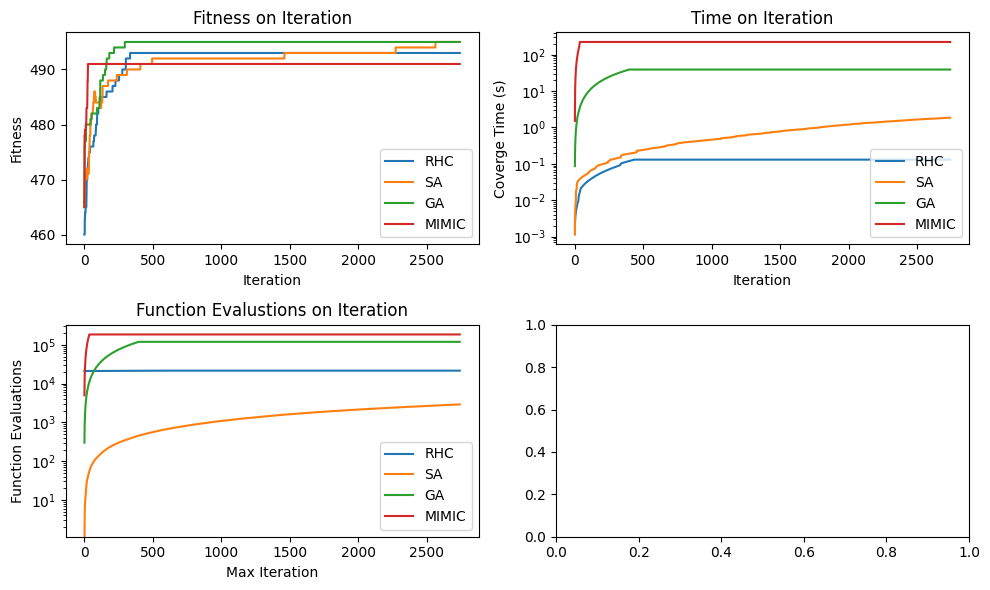

CPU times: user 5min 32s, sys: 5.37 s, total: 5min 38s
Wall time: 7min 11s


In [13]:
%%time
best_params_list = [
    params_complex_queens_rhc,
    params_complex_queens_sa,
    params_complex_queens_ga,
    params_complex_queens_mimic
]
fitness_per_iteration_plot(best_params_list)